In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 34.2 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
import visualkeras
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

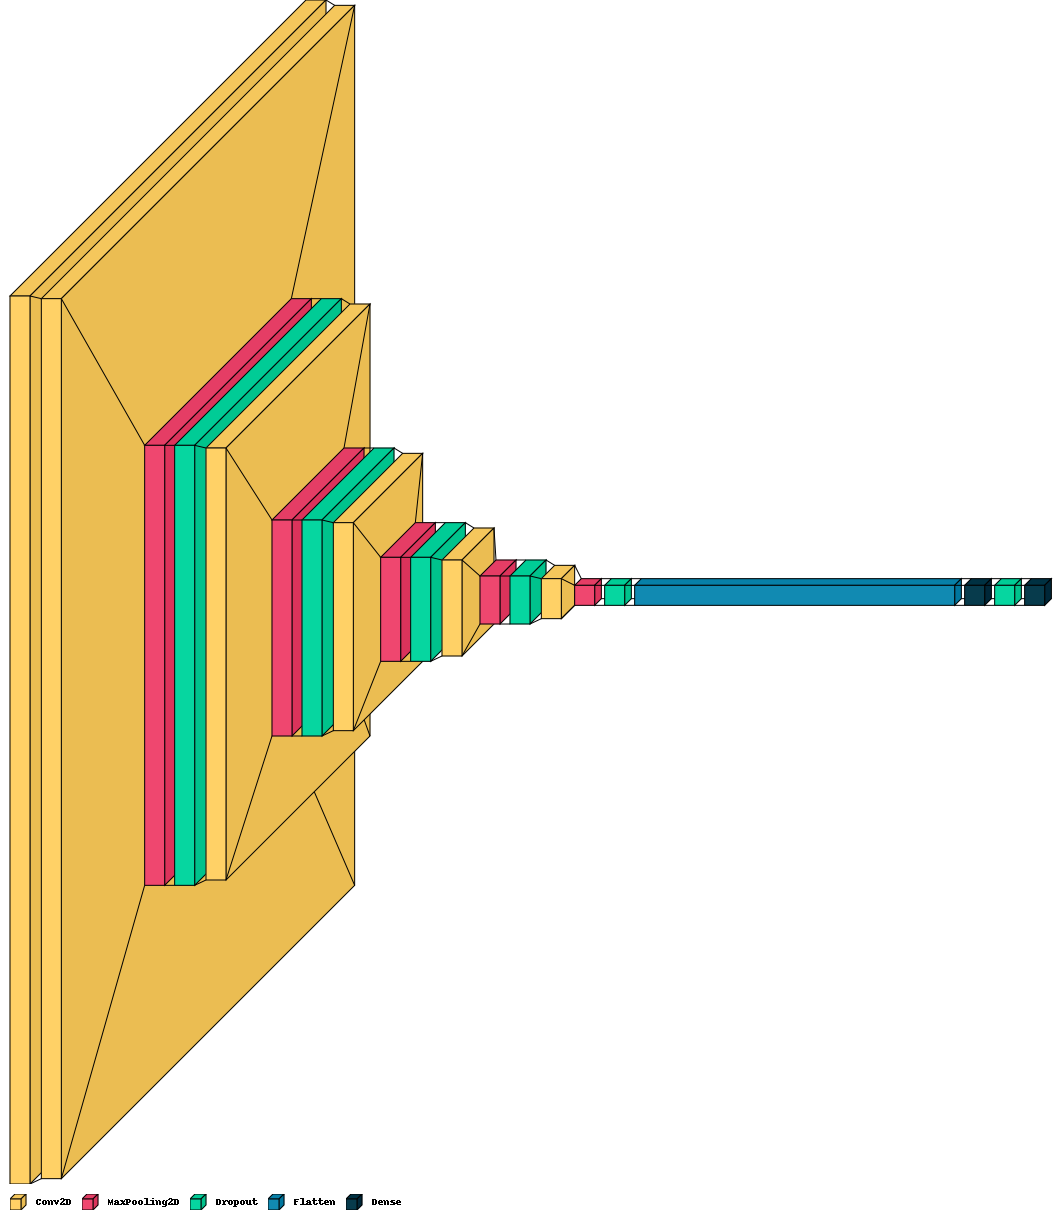

In [ ]:
model.summary()
from PIL import ImageFont

font = ImageFont.load_default()
visualkeras.layered_view(model, legend=True, font=font)  

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/Code_Test/Train',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary')


Found 920 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'drive/MyDrive/Code_Test/Val',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary')

Found 232 images belonging to 2 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint('classification_deep_conv_model.h5', save_best_only=True),
    keras.callbacks.ReduceLROnPlateau()]

In [ ]:
results = model.fit_generator(
    train_generator,
    steps_per_epoch=int(920/64),
    epochs = 100,
    validation_data = validation_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
14/14 [==============================] - 62s 4s/step - loss: 0.7029 - accuracy: 0.5269 - val_loss: 0.6923 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 50s 4s/step - loss: 0.6613 - accuracy: 0.6051 - val_loss: 0.6404 - val_accuracy: 0.6509 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 49s 4s/step - loss: 0.5354 - accuracy: 0.7336 - val_loss: 0.4847 - val_accuracy: 0.9224 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 49s 4s/step - loss: 0.3461 - accuracy: 0.8703 - val_loss: 0.4206 - val_accuracy: 0.9095 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 51s 4s/step - loss: 0.3153 - accuracy: 0.8914 - val_loss: 0.2658 - val_accuracy: 0.9353 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 49s 4s/step - loss: 0.3463 - accuracy: 0.8633 - val_loss: 0.3873 - val_accuracy: 0.9526 - lr: 0.0010
Epoch 7/100
14/14 [==============================] - 49s 4s/step - loss: 0.3

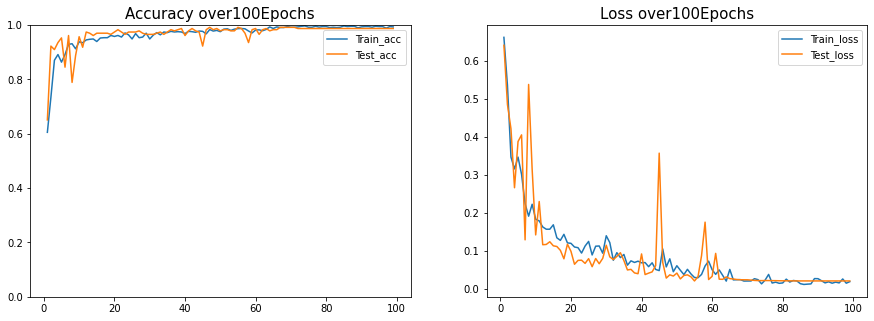

In [ ]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc',scaley=False)
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc',scaley=False)
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.show()
 
plot_acc_loss(results, 100)

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('drive/MyDrive/Code_Test/single_prediction/covid.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)*255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(train_generator.class_indices)

{'Covid': 0, 'Normal': 1}


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


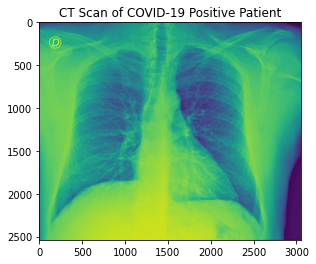

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('drive/MyDrive/Code_Test/single_prediction/covid.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('CT Scan of COVID-19 Positive Patient')


In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: covid


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('drive/MyDrive/Code_Test/single_prediction/normal.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(train_generator.class_indices)


Populating the interactive namespace from numpy and matplotlib
{'Covid': 0, 'Normal': 1}


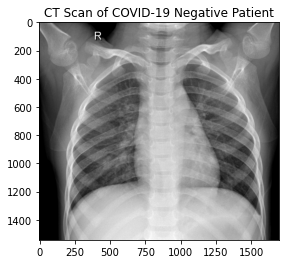

In [ ]:
img=mpimg.imread('drive/MyDrive/Code_Test/single_prediction/normal.jpeg')
imgplot = plt.imshow(img)
plt=plt.title('CT Scan of COVID-19 Negative Patient')

In [ ]:
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
print("AI's prediction is: "+ prediction)

AI's prediction is: covid
